In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,confusion_matrix,mean_squared_error

In [ ]:
import os

In [ ]:
#read the text files from directory and create one file
lines=[]
path = 'Downloads/Data/ETFs/'
file_name=[]
for filename in os.listdir(path):
    with open(os.path.join(path, filename)) as f:    
    
    #append each line in the file to a list
        lines.append(f.readlines())
        file_name.append(filename)
        f.close()
    


# Feature Engineering

In [ ]:
#split the string into separate rows
stock_name=[]
stock=[]
for k in range(len(lines)):
    for i in range(len(lines[k])):
        a=lines[k][i].split(",")
        stock.append(a)
        stock_name.append(file_name[k])
        

In [ ]:
stock_df=pd.DataFrame(stock)
stock_name_df=pd.DataFrame(stock_name)
final_stock=pd.concat([stock_df,stock_name_df],axis=1)

In [ ]:
final_stock.shape

In [ ]:
final_stock.head()

In [ ]:
final_stock.columns=['Date','Open','High','Low','Close','Volume','OpenInt','Ticker']

In [ ]:
#remove rows that have headers from each file
final_stock.drop(final_stock[final_stock['Date']=='Date'].index,inplace=True)

In [ ]:
#drop irrelevant rows
final_stock=final_stock.drop(['OpenInt'],axis=1)

In [ ]:
#filename cleaning
def clean_text(text):
    
    text=text.replace('.us.txt','')
    return text

In [ ]:
final_stock['Ticker']=final_stock['Ticker'].map(lambda x:clean_text(x))

In [ ]:
#create an index with Ticker column to get counts
ticker_count=pd.DataFrame(final_stock['Ticker'].value_counts())
ticker_count.index.name='ticker'

In [ ]:
ticker_count.reset_index().plot(x='ticker', y='Ticker')

In [ ]:
ticker_count=ticker_count.reset_index(level=['ticker'])

In [ ]:
#select only stocks the have data from same set of dates
ticker_count=ticker_count[ticker_count['Ticker']==3201]

In [ ]:
ticker_list=list(ticker_count['ticker'])
len(ticker_list)

In [ ]:
#select only stocks from ticker_list from the original data
final_stock=final_stock[final_stock['Ticker'].isin (ticker_list)]


In [2]:
#save data to local
final_stock.to_csv("~/Desktop/Data/stock.csv")

NameError: name 'final_stock' is not defined

In [71]:
import pandas as pd
final_stock=pd.read_csv("~/Desktop/Data/stock.csv",parse_dates=['Date'])

In [72]:
final_stock.head()

,Ticker,Date,Close
0,vti,2005-02-25,52.143
1,vti,2005-02-28,51.876
2,vti,2005-03-01,52.180
3,vti,2005-03-02,52.124
4,vti,2005-03-03,52.187


In [74]:
final_stock=final_stock[['Date','Close','Ticker']]

In [75]:
#get year from date field
def date_pull(data):
    
    final_stock['year']=final_stock['Date'].dt.year
    
date_pull(final_stock)


In [76]:
#pivot the data to desired format
final_stock=final_stock.pivot(index='Date',columns='Ticker',values='Close')

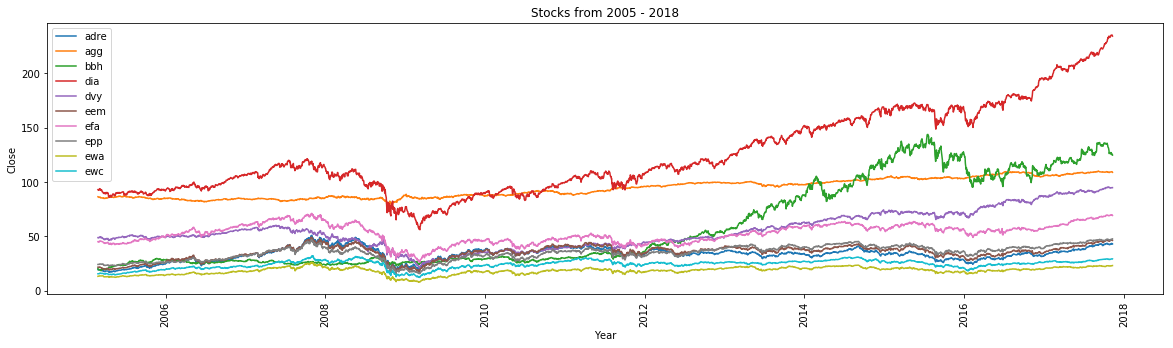

In [79]:
#visualize the first 20 stocks
import matplotlib.pyplot as plt
count=0
fig= plt.figure(figsize=(20,5))

for i in final_stock.columns:
    
    if (count<10):
        a=pd.DataFrame(final_stock.index)
        plt.plot(a['Date'],final_stock[i])
        count=count+1
        plt.xticks(rotation='vertical')
        plt.legend()
        plt.title("Stocks from 2005 - 2018")
        plt.xlabel("Year")
        plt.ylabel("Close")
        
        
# Tweak spacing to prevent clipping of tick-labels
        
    
plt.show() 


In [9]:
#calculating daily change and correlatoin plot
daily_simple_returns= final_stock.pct_change()
corr_plot= daily_simple_returns.corr()

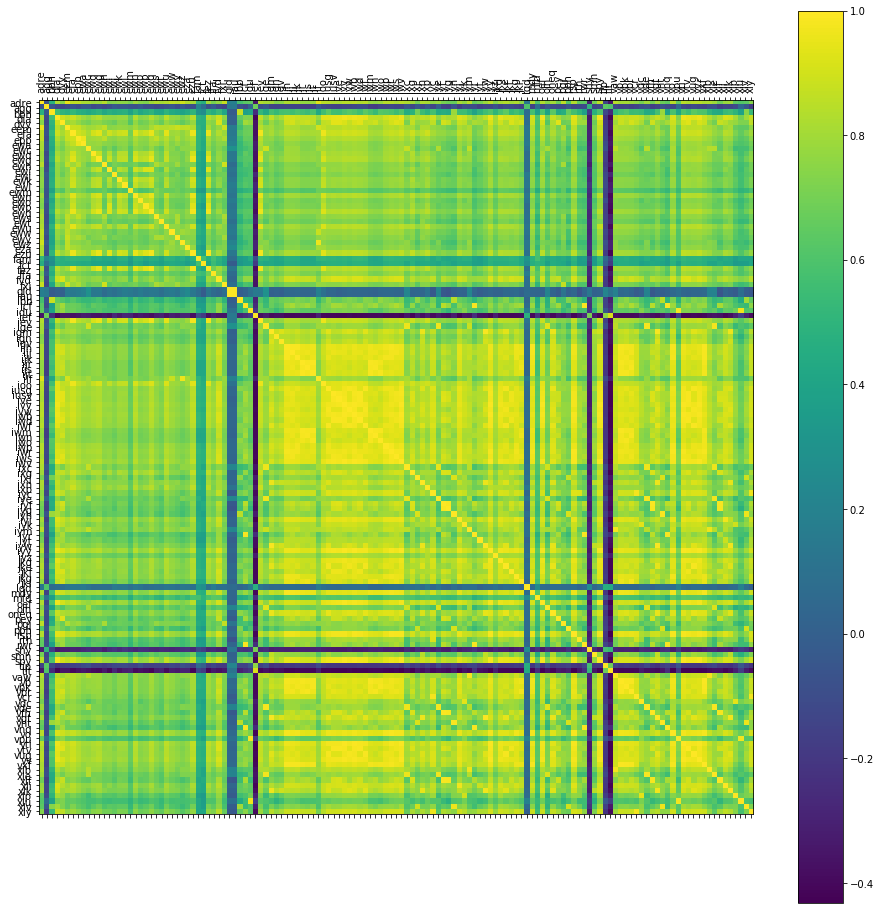

In [10]:
#correlation plot to see correlation between stocks
from pylab import rcParams
rcParams['figure.figsize'] = 25,25
plt.matshow(corr_plot)
plt.xticks(range(len(daily_simple_returns.columns)),((daily_simple_returns.columns)),rotation=90)
plt.yticks(range(len(daily_simple_returns.columns)),daily_simple_returns.columns)
plt.colorbar()
plt.show()

In [11]:
#after analysis highly correlated stocks were selected 
stocks_final=final_stock[['eem','ilf','efa','epp','ewz','fxi','ioo','iwb','pgj','spy','vti']]
daily_simple_returns_stocks = stocks_final.pct_change()
corrs_stocks = daily_simple_returns_stocks.corr()
corrs_stocks.style.background_gradient(cmap='coolwarm')
#tickers picked- [['eem','ilf','efa','epp','ewz','fxi','ioo','iwb','pgj','spy','vti']]

Ticker,eem,ilf,efa,epp,ewz,fxi,ioo,iwb,pgj,spy,vti
Ticker,,,,,,,,,,,
eem,1,0.904138,0.884548,0.880113,0.855502,0.891812,0.87468,0.867721,0.829897,0.866781,0.866195
ilf,0.904138,1,0.818816,0.803772,0.962735,0.771494,0.813929,0.80698,0.755383,0.805763,0.805912
efa,0.884548,0.818816,1,0.896968,0.762666,0.784153,0.961169,0.900911,0.769933,0.906308,0.901414
epp,0.880113,0.803772,0.896968,1,0.758968,0.822437,0.873057,0.846771,0.792578,0.85312,0.848074
ewz,0.855502,0.962735,0.762666,0.758968,1,0.723279,0.751084,0.741817,0.704123,0.740556,0.741096
fxi,0.891812,0.771494,0.784153,0.822437,0.723279,1,0.770221,0.766796,0.866118,0.767147,0.763027
ioo,0.87468,0.813929,0.961169,0.873057,0.751084,0.770221,1,0.946644,0.763475,0.947962,0.944669
iwb,0.867721,0.80698,0.900911,0.846771,0.741817,0.766796,0.946644,1,0.777791,0.988525,0.992808
pgj,0.829897,0.755383,0.769933,0.792578,0.704123,0.866118,0.763475,0.777791,1,0.773611,0.778624


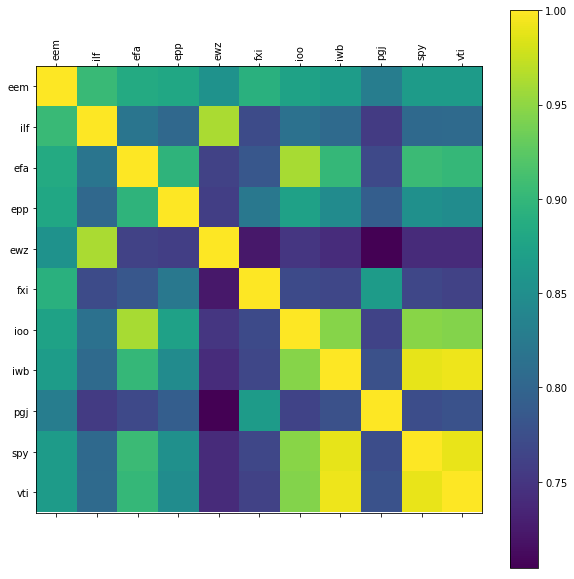

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
plt.matshow(corrs_stocks)
plt.xticks(range(len(daily_simple_returns_stocks.columns)),((daily_simple_returns_stocks.columns)),rotation=90)
plt.yticks(range(len(daily_simple_returns_stocks.columns)),daily_simple_returns_stocks.columns)
plt.colorbar()
plt.show()

In [17]:
#split the data into predictors and target
X=stocks_final.iloc[:,:-1].values
y=stocks_final.iloc[:,-1].values

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
X_test.shape

(1281, 10)

# Build Model

In [24]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [25]:
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred=linear_reg.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))


Mean Squared Error:  0.03788583191692823


In [57]:
date=pd.DataFrame(stocks_final.index)
date=date.iloc[-1281:]

In [66]:
stock_vis=pd.DataFrame({'test':y_test,
                        'pred':y_pred,
                        'year':date['Date'].dt.date})

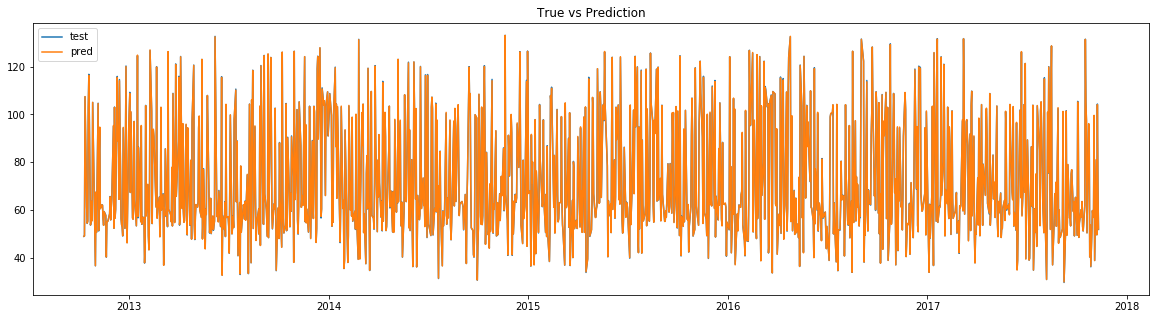

In [81]:
#Visualize the results
fig= plt.figure(figsize=(20,5))
plt.title("True vs Prediction")
plt.plot(stock_vis['year'],stock_vis['test'])
plt.plot(stock_vis['year'],stock_vis['pred'])
plt.legend()
plt.show()
